In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\smcljy\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_stata("./PFT_SAMPLE.dta")

# data.fillna(0)

data[['AGE', 'SM0101', 'SM0102',
       'SM0401', 'SM040101', 'SM0402', 'SM040201', 'SM0403', 'SM0404',
       'SM040401', 'SM0405', 'SM040501']]=data[['AGE', 'SM0101', 'SM0102',
       'SM0401', 'SM040101', 'SM0402', 'SM040201', 'SM0403', 'SM0404',
       'SM040401', 'SM0405', 'SM040501']].apply(pd.to_numeric,errors='coerce')


data.rename(columns={'SEX':'GENDER', 'YYYY':'YEAR'},inplace=True)

In [3]:
data = data.drop(data.loc[data['GENDER']==""].index) # nan이 아니어서 이렇게 적용
data = data.drop(data.loc[data['AGE']==""].index) # nan이 아니어서 이렇게 적용
data.dropna(subset=['SM0101'],inplace=True)
data.dropna(subset=['SM0102'],inplace=True)

data

,YEAR,ID_NO,AGE,GENDER,SM0101,SM0102,SM0401,SM040101,SM0402,SM040201,SM0403,SM0404,SM040401,SM0405,SM040501
0,2019,A1,48.0,M,179.5,93.5,5.43,99.0,4.07,96.0,75.0,3.14,85.0,10.97,119.0
1,2019,A2,52.0,F,156.4,45.5,3.28,105.0,2.56,98.0,78.0,2.25,84.0,7.71,137.0
2,2019,A3,31.0,F,163.6,46.9,3.29,90.0,3.04,94.0,92.0,3.78,109.0,5.34,82.0
3,2019,A4,52.0,M,175.3,69.5,4.18,85.0,3.20,82.0,77.0,2.78,81.0,7.10,82.0
4,2019,A5,50.0,F,149.2,45.4,3.06,106.0,2.65,110.0,87.0,3.27,127.0,4.75,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607875,2018,A607876,74.0,M,170.1,63.6,3.75,86.0,1.72,57.0,46.0,0.54,23.0,6.09,82.0
607876,2019,A607877,75.0,M,170.2,62.4,3.33,76.0,1.62,54.0,49.0,0.50,22.0,4.11,56.0
607877,2007,A607878,68.0,M,157.5,58.5,2.91,90.0,2.51,111.0,86.0,3.29,139.0,5.07,79.0
607878,2004,A607879,37.0,M,171.0,63.2,4.24,89.0,3.83,103.0,90.0,5.21,130.0,9.35,107.0


# 최정근식 calculated value

In [4]:
# 최정근식 기준값 반영
data.loc[(data['GENDER'] =='F'),'pred_fvc'] = round((-3.0006 - (0.0001273 *data['AGE']*data['AGE'])) + (0.03951*data['SM0101']) + (0.006892*data['SM0102']),2)
data.loc[(data['GENDER'] =='M'),'pred_fvc'] = round((-4.8434 - (0.00008633 *data['AGE']*data['AGE'])) + (0.05292*data['SM0101']) + (0.01095*data['SM0102']),2)

data.loc[(data['GENDER'] =='F'),'pred_FEV1']                       = round((-2.4114 - (0.0001920 *data['AGE']*data['AGE'])) + (0.03558*data['SM0101']),2)
data.loc[(data['GENDER'] =='M') & (data['AGE'] <= 99),'pred_FEV1'] = round((-3.4132 - (0.0002484 *data['AGE']*data['AGE'])) + (0.04578*data['SM0101']),2)

data.loc[(data['GENDER'] =='F') & (18 <= data['AGE']) & (data['AGE'] <= 99),'pred_FEV1/FVC'] = round(97.8567 - (0.2800*data['AGE']) - (0.01564*data['SM0101']))
data.loc[(data['GENDER'] =='M') & (18 <= data['AGE']) & (data['AGE'] <= 99),'pred_FEV1/FVC'] = round(119.9004 - (0.3902*data['AGE']) - (0.1268*data['SM0101']))

In [5]:
# 보정된 예측값으로 재계산
data['cal_fvc%'] = round(data['SM0401']/data['pred_fvc'] * 100)
data['cal_FEV1%'] = round(data['SM0402']/data['pred_FEV1'] * 100)

In [6]:
data.loc[(data['cal_fvc%'] != data['SM040101']),'FVC%_DIFF'] = 'Y'
data.loc[(data['cal_fvc%'] == data['SM040101']),'FVC%_DIFF'] = 'N'
data

,YEAR,ID_NO,AGE,GENDER,SM0101,SM0102,SM0401,SM040101,SM0402,SM040201,...,SM0404,SM040401,SM0405,SM040501,pred_fvc,pred_FEV1,pred_FEV1/FVC,cal_fvc%,cal_FEV1%,FVC%_DIFF
0,2019,A1,48.0,M,179.5,93.5,5.43,99.0,4.07,96.0,...,3.14,85.0,10.97,119.0,5.48,4.23,78.0,99.0,96.0,N
1,2019,A2,52.0,F,156.4,45.5,3.28,105.0,2.56,98.0,...,2.25,84.0,7.71,137.0,3.15,2.63,81.0,104.0,97.0,Y
2,2019,A3,31.0,F,163.6,46.9,3.29,90.0,3.04,94.0,...,3.78,109.0,5.34,82.0,3.66,3.22,87.0,90.0,94.0,N
3,2019,A4,52.0,M,175.3,69.5,4.18,85.0,3.20,82.0,...,2.78,81.0,7.10,82.0,4.96,3.94,77.0,84.0,81.0,Y
4,2019,A5,50.0,F,149.2,45.4,3.06,106.0,2.65,110.0,...,3.27,127.0,4.75,89.0,2.89,2.42,82.0,106.0,110.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607875,2018,A607876,74.0,M,170.1,63.6,3.75,86.0,1.72,57.0,...,0.54,23.0,6.09,82.0,4.38,3.01,69.0,86.0,57.0,N
607876,2019,A607877,75.0,M,170.2,62.4,3.33,76.0,1.62,54.0,...,0.50,22.0,4.11,56.0,4.36,2.98,69.0,76.0,54.0,N
607877,2007,A607878,68.0,M,157.5,58.5,2.91,90.0,2.51,111.0,...,3.29,139.0,5.07,79.0,3.73,2.65,73.0,78.0,95.0,Y
607878,2004,A607879,37.0,M,171.0,63.2,4.24,89.0,3.83,103.0,...,5.21,130.0,9.35,107.0,4.78,4.08,84.0,89.0,94.0,N


# cal_fvc% value distribution with gender

c:\Users\smcljy\.conda\envs\dlml\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


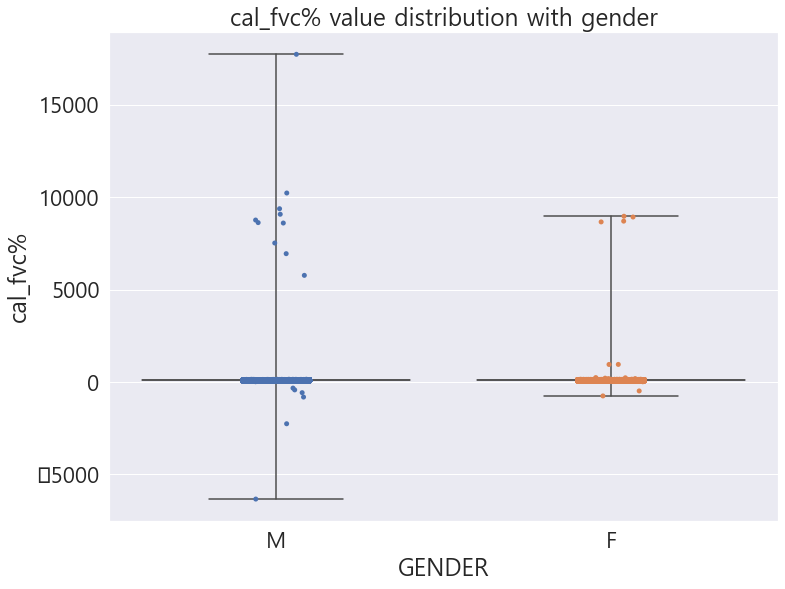

In [8]:
# 기본환경 설정
sns.set(font_scale = 2,font='Malgun Gothic',style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
# title
plt.title("cal_fvc% value distribution with gender")
# plot type 설정
sns.boxplot(x="GENDER", y="cal_fvc%",data=data, whis=np.inf)
sns.stripplot(x="GENDER", y="cal_fvc%",data=data, jitter=True)#, color="0.4")

plt.show()

# Outlier drop

In [9]:
# Outlier 제거
data.loc[(data['cal_fvc%'] < 0) | (data['cal_fvc%'] > 200),'outlier'] = 'Y'
data2 = data.drop(data.loc[data['outlier']=='Y'].index)

data2

,YEAR,ID_NO,AGE,GENDER,SM0101,SM0102,SM0401,SM040101,SM0402,SM040201,...,SM040401,SM0405,SM040501,pred_fvc,pred_FEV1,pred_FEV1/FVC,cal_fvc%,cal_FEV1%,FVC%_DIFF,outlier
0,2019,A1,48.0,M,179.5,93.5,5.43,99.0,4.07,96.0,...,85.0,10.97,119.0,5.48,4.23,78.0,99.0,96.0,N,NaN
1,2019,A2,52.0,F,156.4,45.5,3.28,105.0,2.56,98.0,...,84.0,7.71,137.0,3.15,2.63,81.0,104.0,97.0,Y,NaN
2,2019,A3,31.0,F,163.6,46.9,3.29,90.0,3.04,94.0,...,109.0,5.34,82.0,3.66,3.22,87.0,90.0,94.0,N,NaN
3,2019,A4,52.0,M,175.3,69.5,4.18,85.0,3.20,82.0,...,81.0,7.10,82.0,4.96,3.94,77.0,84.0,81.0,Y,NaN
4,2019,A5,50.0,F,149.2,45.4,3.06,106.0,2.65,110.0,...,127.0,4.75,89.0,2.89,2.42,82.0,106.0,110.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607875,2018,A607876,74.0,M,170.1,63.6,3.75,86.0,1.72,57.0,...,23.0,6.09,82.0,4.38,3.01,69.0,86.0,57.0,N,NaN
607876,2019,A607877,75.0,M,170.2,62.4,3.33,76.0,1.62,54.0,...,22.0,4.11,56.0,4.36,2.98,69.0,76.0,54.0,N,NaN
607877,2007,A607878,68.0,M,157.5,58.5,2.91,90.0,2.51,111.0,...,139.0,5.07,79.0,3.73,2.65,73.0,78.0,95.0,Y,NaN
607878,2004,A607879,37.0,M,171.0,63.2,4.24,89.0,3.83,103.0,...,130.0,9.35,107.0,4.78,4.08,84.0,89.0,94.0,N,NaN


# cal_fvc% value distribution(outlier drop)

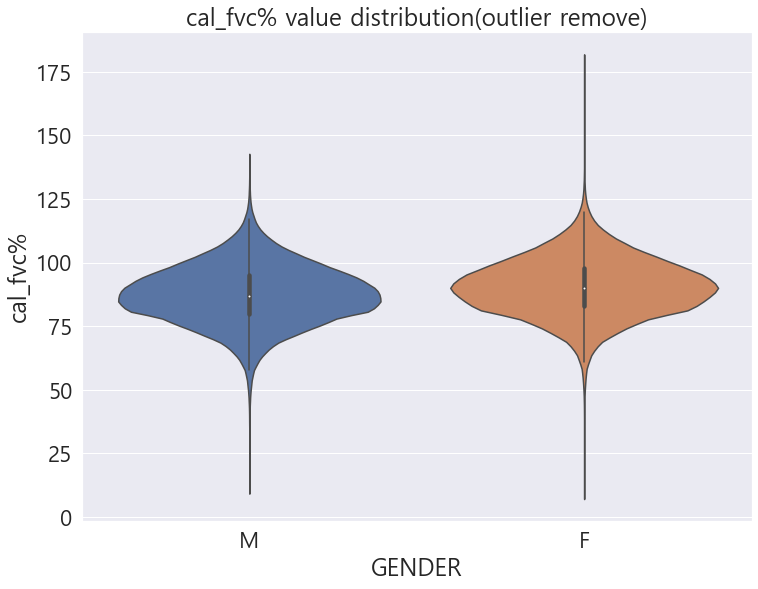

In [10]:
sns.set(font_scale = 2,font='Malgun Gothic',style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
plt.title("cal_fvc% value distribution(outlier remove)")
sns.violinplot(x="GENDER", y="cal_fvc%",data=data2)

plt.show()

# FVC% differences distribution

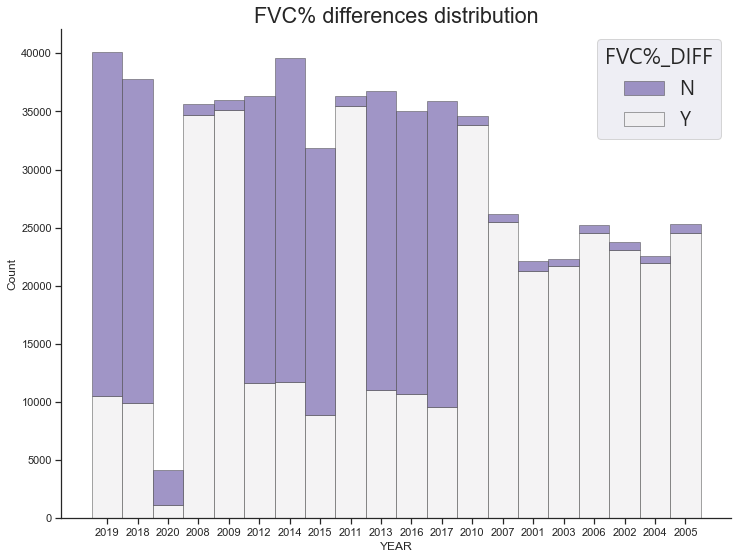

In [11]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 9))
sns.despine(f)

sns.set(font_scale = 1.8,font='Malgun Gothic')
plt.title("FVC% differences distribution", )
sns.histplot(
    data2,
    x="YEAR", hue="FVC%_DIFF",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5
#     log_scale=True,
)

plt.show()

#### seaborn에는 X축 값의 순서를 조정하는 파라미터가 없음.

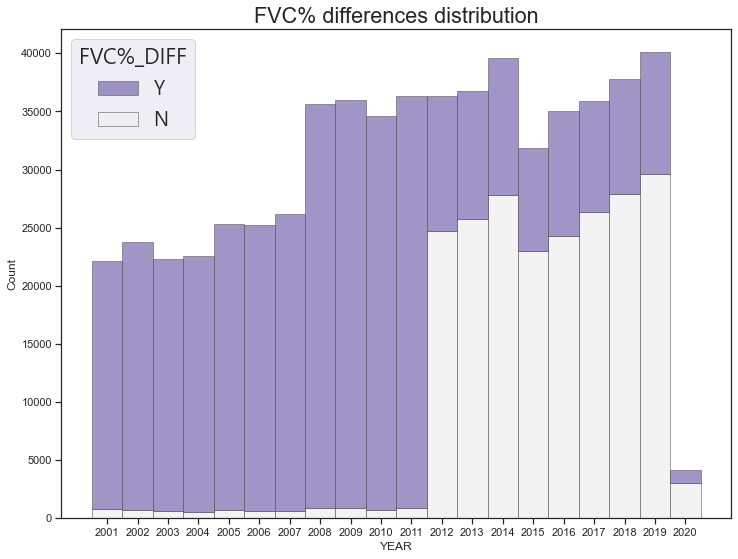

In [12]:
# 데이터 조회 순서대로 조회하므로 년도별로 sort해 줌.
data2 = data2.sort_values(['YEAR','ID_NO'])

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 9))
# sns.despine(f)

sns.set(font_scale = 1.8,font='Malgun Gothic')
plt.title("FVC% differences distribution", )
sns.histplot(
    data2,
    x="YEAR", hue="FVC%_DIFF",hue_order=(['Y','N']),
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    # order=[data2.groupby('YEAR').groups.keys()],
    # bins=len(data2.groupby('YEAR').groups.keys()),
)

plt.show()

# (FVC% - cal_fvc%) value distribution(outlier remove)

In [13]:
# reported value - calculated value
data2['ERR_VL'] = data2['SM040101']-data2['cal_fvc%']
data2

,YEAR,ID_NO,AGE,GENDER,SM0101,SM0102,SM0401,SM040101,SM0402,SM040201,...,SM0405,SM040501,pred_fvc,pred_FEV1,pred_FEV1/FVC,cal_fvc%,cal_FEV1%,FVC%_DIFF,outlier,ERR_VL
10009,2001,A10010,38.0,F,166.4,55.6,3.07,83.0,2.56,88.0,...,5.22,NaN,3.77,3.23,85.0,81.0,79.0,Y,NaN,2.0
10018,2001,A10019,34.0,M,176.3,68.6,4.50,88.0,4.15,104.0,...,11.24,NaN,5.14,4.37,84.0,88.0,95.0,N,NaN,0.0
100432,2001,A100433,53.0,M,168.6,72.0,4.67,111.0,3.85,124.0,...,8.48,NaN,4.62,3.61,78.0,101.0,107.0,Y,NaN,10.0
100436,2001,A100437,49.0,F,154.3,52.1,2.97,99.0,2.43,107.0,...,6.46,NaN,3.15,2.62,82.0,94.0,93.0,Y,NaN,5.0
100446,2001,A100447,55.0,F,159.1,62.9,3.43,112.0,3.05,133.0,...,5.86,NaN,3.33,2.67,80.0,103.0,114.0,Y,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98851,2020,A98852,54.0,M,171.7,64.8,4.24,90.0,3.14,84.0,...,6.29,76.0,4.70,3.72,77.0,90.0,84.0,N,NaN,0.0
98879,2020,A98880,48.0,M,181.5,82.3,4.49,82.0,3.47,80.0,...,8.57,91.0,5.46,4.32,78.0,82.0,80.0,N,NaN,0.0
99071,2020,A99072,58.0,M,170.0,61.7,4.21,93.0,3.36,95.0,...,9.08,114.0,4.54,3.53,76.0,93.0,95.0,N,NaN,0.0
99425,2020,A99426,30.0,M,183.6,73.7,5.59,99.0,4.74,99.0,...,12.69,124.0,5.60,4.77,85.0,100.0,99.0,Y,NaN,-1.0


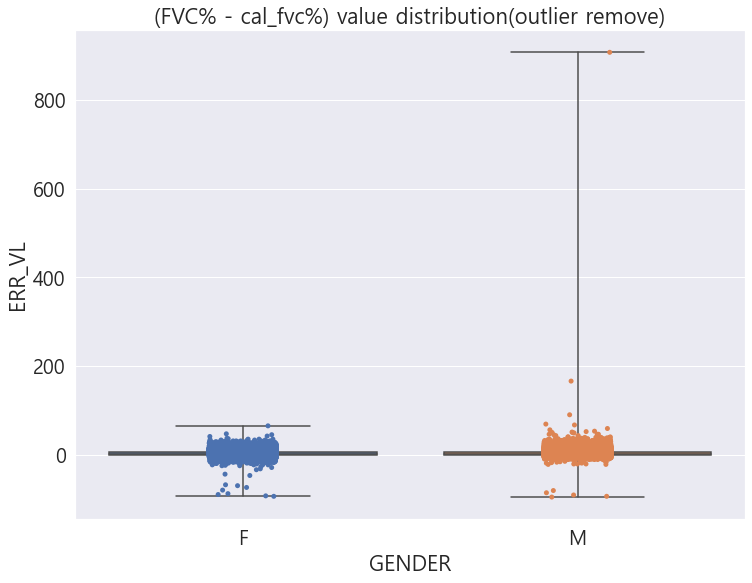

In [14]:
sns.set(font_scale = 1.8,font='Malgun Gothic')
plt.title("(FVC% - cal_fvc%) value distribution(outlier remove)")
# sns.violinplot(x="GENDER", y="ERR_VL",data=data2)
sns.boxplot(x="GENDER", y="ERR_VL",data=data2, whis=np.inf)
sns.stripplot(x="GENDER", y="ERR_VL",data=data2, jitter=True)#, color="0.4")

plt.show()